In [1]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem, ttest_ind

In [2]:
#import csv file
df = pd.read_csv('data/cleaned_data.csv')
df.head(1)

,Unnamed: 0,Unnamed: 0.1,video_id,trending_date,category_id,publish_time,views,likes,dislikes,comment_count,Country Code,Days to trend
0,0,0,2kyS6SvSYSE,2017-11-14,22,2017-11-13,748374,57527,2966,15954,US,1 days 00:00:00.000000000


In [3]:
#drop columns I know I will not be looking at
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'trending_date', 'category_id', 'publish_time', 'Days to trend' ], axis=1)
df.head(1)

,video_id,views,likes,dislikes,comment_count,Country Code
0,2kyS6SvSYSE,748374,57527,2966,15954,US


In [4]:
#find the max values of views, likes, dislikes, and comments for each video_id
df = pd.DataFrame(df.groupby(['video_id']).max())
df.head(1)

,views,likes,dislikes,comment_count,Country Code
video_id,,,,,
--1skHapGUc,30914,483,77,81,MX


In [5]:
#create duplicate df to come back to if data gets messed up
df1 = df
df1.head(1)

,views,likes,dislikes,comment_count,Country Code
video_id,,,,,
--1skHapGUc,30914,483,77,81,MX


In [ ]:
#df = df1
df1.head()

In [6]:
#add column for total likes and dislikes
df['Total Likes and Dislikes'] = df['likes'] + df['dislikes']
df.head(1)

,views,likes,dislikes,comment_count,Country Code,Total Likes and Dislikes
video_id,,,,,,
--1skHapGUc,30914,483,77,81,MX,560


In [7]:
#add column for percentage of likes among likes/dislikes
df['Likes/Dislikes Ratio'] = df['likes'] / df['dislikes']
df.head(1)

,views,likes,dislikes,comment_count,Country Code,Total Likes and Dislikes,Likes/Dislikes Ratio
video_id,,,,,,,
--1skHapGUc,30914,483,77,81,MX,560,6.272727


In [8]:
#add column for how many views each video received per like/dislike, rounded to two digits
df['View per (dis)like'] = round(df['views'] / df['Total Likes and Dislikes'], 2)
df.head(3)

,views,likes,dislikes,comment_count,Country Code,Total Likes and Dislikes,Likes/Dislikes Ratio,View per (dis)like
video_id,,,,,,,,
--1skHapGUc,30914,483,77,81,MX,560,6.272727,55.20
--2K8l6BWfw,4822,694,4,34,FR,698,173.500000,6.91
--45ws7CEN0,309197,3837,516,278,RU,4353,7.436047,71.03


In [11]:
#find outliers for number of views
views_q1 = np.percentile(df['views'], 25) #find lower and upper quartiles 
views_q3 = np.percentile(df['views'], 75)
views_qrange = (views_q3 - views_q1) #find interquartile range
views_lower =  views_q1 - (1.5 * views_qrange) #lower boundry
views_upper = views_q3 + (1.5 * views_qrange) #upper boundry
df['outliers'] = (df['views'] < views_lower) | (df['views'] > views_upper) #find outliers
df = df[df['outliers'] == False]
df.head(1)


,views,likes,dislikes,comment_count,Country Code,Total Likes and Dislikes,Likes/Dislikes Ratio,View per (dis)like,outliers
video_id,,,,,,,,,
--1skHapGUc,30914,483,77,81,MX,560,6.272727,55.20,False
--2K8l6BWfw,4822,694,4,34,FR,698,173.500000,6.91,False
--45ws7CEN0,309197,3837,516,278,RU,4353,7.436047,71.03,False
--6vcer7XYQ,414012,2161,331,416,MX,2492,6.528701,166.14,False
--728h8mnDY,39535,2573,51,269,FR,2624,50.450980,15.07,False
--8-sr76Haw,6980,1429,6,248,FR,1435,238.166667,4.86,False
--9LvCHDHYQ,3490,240,2,14,RU,242,120.000000,14.42,False
--DqT_lWyEU,14992,1087,29,74,FR,1116,37.482759,13.43,False
--FcOKEq9gU,8354,214,15,24,FR,229,14.266667,36.48,False


In [19]:
#find outliers for Likes/Dislikes ratio
ratio_q1 = np.percentile(df['Likes/Dislikes Ratio'], 25) #find lower and upper quartiles 
ratio_q3 = np.percentile(df['Likes/Dislikes Ratio'], 75)
ratio_qrange = (ratio_q3 - ratio_q1) #find interquartile range
ratio_lower =  ratio_q1 - (1.5 * ratio_qrange) #lower boundry
ratio_upper = ratio_q3 + (1.5 * ratio_qrange) #upper boundry
df['outliers'] = (df['Likes/Dislikes Ratio'] < ratio_lower) |(df['Likes/Dislikes Ratio'] > ratio_upper) #find outliers
df = df[df['outliers'] == False]
df.head(1)

/Users/jeremiahherberg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,views,likes,dislikes,comment_count,Country Code,Total Likes and Dislikes,Likes/Dislikes Ratio,View per (dis)like,outliers
video_id,,,,,,,,,
--1skHapGUc,30914,483,77,81,MX,560,6.272727,55.20,False
--45ws7CEN0,309197,3837,516,278,RU,4353,7.436047,71.03,False
--6vcer7XYQ,414012,2161,331,416,MX,2492,6.528701,166.14,False
--728h8mnDY,39535,2573,51,269,FR,2624,50.450980,15.07,False
--DqT_lWyEU,14992,1087,29,74,FR,1116,37.482759,13.43,False
--FcOKEq9gU,8354,214,15,24,FR,229,14.266667,36.48,False
--I0aj8MUdU,139025,490,78,22,FR,568,6.282051,244.76,False
--MtKsH5oBY,511042,3517,372,767,FR,3889,9.454301,131.41,False
--YgtVuvWGo,362391,21547,356,955,CA,21903,60.525281,16.55,False


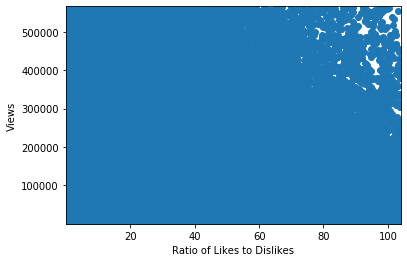

In [32]:
#create scatter plot comparing views to the ratio of likes to dislikes
plt.scatter(df['Likes/Dislikes Ratio'], df['views'])
plt.ylim(df['views'].min(), df['views'].max())
plt.xlim(df['Likes/Dislikes Ratio'].min(), df['Likes/Dislikes Ratio'].max())
plt.xlabel('Ratio of Likes to Dislikes')
plt.ylabel('Views')
plt.show()

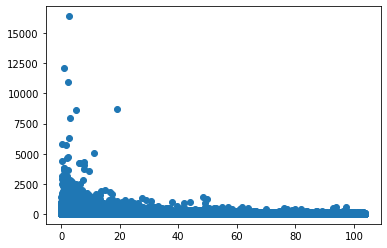

In [23]:
plt.scatter(df['Likes/Dislikes Ratio'], df['View per (dis)like'])
plt.show()

In [31]:
df.count()

views                       140907
likes                       140907
dislikes                    140907
comment_count               140907
Country Code                140907
Total Likes and Dislikes    140907
Likes/Dislikes Ratio        140907
View per (dis)like          140907
outliers                    140907
dtype: int64